In [191]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'train_metadata', 'train', 'test_images', 'train_sentiment', 'train_images', 'test_metadata', 'state_labels.csv', 'test_sentiment', 'breed_labels.csv', 'color_labels.csv']


In [192]:
train = pd.read_csv("../input/train/train.csv")
test = pd.read_csv("../input/test/test.csv")
breed_labels = pd.read_csv("../input/breed_labels.csv")
color_labels = pd.read_csv("../input/color_labels.csv")
state_labels = pd.read_csv("../input/state_labels.csv")
submission = pd.read_csv("../input/test/sample_submission.csv")

In [193]:
train.head()



,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [194]:

breed_labels.head()


,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [195]:
color_labels.head()


,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [196]:
state_labels.head()


,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


As we'll be doing EDA on training set. We need to change the numerical notation with text.


In [197]:
#Copy training set to train_eda
train_ed = train.copy()
train_ed.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [198]:
# Joining train_eda with state labels, breed_labels and color labels datasets
breed_labels.rename(columns={'BreedID':'Breed1'}, inplace=True)
state_labels.rename(columns={'StateID':'State'}, inplace=True)
train_ed = train_ed.merge(state_labels,on="State",how='left')
train_ed = train_ed.merge(breed_labels,on="Breed1",how='left')
train_ed.shape

(14993, 27)

In [199]:
train_ed.rename(columns={'BreedName':'MainBreed'}, inplace=True)
train_ed.rename(columns={'Type_x':'Type'}, inplace=True)

In [200]:
train_ed= train_ed.drop(["Breed1",'Type_y'],axis = 1)
train_ed.columns

Index(['Type', 'Name', 'Age', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3',
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
       'Health', 'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt',
       'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed', 'StateName',
       'MainBreed'],
      dtype='object')

In [201]:
breed_labels.rename(columns={'Breed1':'Breed2',"BreedName":"SecondaryName"},inplace = True)


In [202]:
train_ed=train_ed.merge(breed_labels,on="Breed2",how="left")
train_ed.rename(columns={'Type_x':'Type'},inplace = True)
train_ed=train_ed.drop(["Type_y",'Breed2'],axis = 1)
train_ed.columns
train_ed.shape

(14993, 25)

In [203]:
color_labels.rename(columns={'ColorID':'Color1','ColorName':'ColorName1'},inplace = True)
train_ed=train_ed.merge(color_labels,on='Color1',how='left')
train_ed.shape

(14993, 26)

In [204]:
color_labels.rename(columns={'Color1':'Color2','ColorName1':'ColorName2'},inplace = True)


In [205]:
train_ed=train_ed.merge(color_labels,on='Color2',how='left')
train_ed.columns

Index(['Type', 'Name', 'Age', 'Gender', 'Color1', 'Color2', 'Color3',
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
       'Health', 'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt',
       'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed', 'StateName',
       'MainBreed', 'SecondaryName', 'ColorName1', 'ColorName2'],
      dtype='object')

In [206]:
color_labels.rename(columns={'Color2':'Color3','ColorName2':'ColorName3'},inplace = True)
train_ed=train_ed.merge(color_labels,on='Color3',how='left')

In [207]:

train_ed = train_ed.drop(["Color1",'Color2','Color3'],axis = 1)
train_ed.columns


Index(['Type', 'Name', 'Age', 'Gender', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee',
       'State', 'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed', 'StateName', 'MainBreed', 'SecondaryName',
       'ColorName1', 'ColorName2', 'ColorName3'],
      dtype='object')

In [208]:
train_ed.shape

(14993, 25)

In [209]:
train_ed = train_ed.drop(["State"],axis = 1)


In [210]:
train_ed.head()

,Type,Name,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,StateName,MainBreed,SecondaryName,ColorName1,ColorName2,ColorName3
0,2,Nibble,3,1,1,1,2,2,2,1,1,100,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,Selangor,Tabby,NaN,Black,White,NaN
1,2,No Name Yet,1,1,2,2,3,3,3,1,1,0,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,Kuala Lumpur,Domestic Medium Hair,NaN,Black,Brown,NaN
2,1,Brisco,1,1,2,2,1,1,2,1,1,0,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,Selangor,Mixed Breed,NaN,Brown,White,NaN
3,1,Miko,4,2,2,1,1,1,2,1,1,150,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,Kuala Lumpur,Mixed Breed,NaN,Black,Brown,NaN
4,1,Hunter,1,1,2,1,2,2,2,1,1,0,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,Selangor,Mixed Breed,NaN,Black,NaN,NaN


In [211]:
train_ed["Gender"]=train_ed["Gender"].replace({1:'Male',2:'Female',3:'Mixed'})
train_ed["MaturitySize"]=train_ed["MaturitySize"].replace({1:'Small',2:'Medium',3:'Large',4:'Extra Large',0:"Not Specified"})
train_ed["FurLength"]=train_ed["FurLength"].replace({1:'Short',2:'Medium',3:'Long',0:"Not Specified"})
train_ed["Vaccinated"]=train_ed["Vaccinated"].replace({1:'Yes',2:'No',3:'Not Sure'})
train_ed["Dewormed"]=train_ed["Dewormed"].replace({1:'Yes',2:'No',3:'Not Sure'})
train_ed["Sterilized"]=train_ed["Sterilized"].replace({1:'Yes',2:'No',3:'Not Sure'})
train_ed["Health"]=train_ed["Health"].replace({1:'Healthy',2:'Minor Injury',3:'Major Injury',0:"Not Specified"})
train_ed["Type"]=train_ed["Type"].replace({1:'Dog',2:'Cat'})
train_ed["AdoptionSpeed"]=train_ed["AdoptionSpeed"].replace({0:'Adopted on the same day',1:'Adopted within 1 week',2:'Adopted within 1 month',3:'Adopted within 2-3 months',4:'Didnt get adopted'})
train_ed.head()


,Type,Name,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,StateName,MainBreed,SecondaryName,ColorName1,ColorName2,ColorName3
0,Cat,Nibble,3,Male,Small,Short,No,No,No,Healthy,1,100,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,Adopted within 1 month,Selangor,Tabby,NaN,Black,White,NaN
1,Cat,No Name Yet,1,Male,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,0,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,Adopted on the same day,Kuala Lumpur,Domestic Medium Hair,NaN,Black,Brown,NaN
2,Dog,Brisco,1,Male,Medium,Medium,Yes,Yes,No,Healthy,1,0,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,Adopted within 2-3 months,Selangor,Mixed Breed,NaN,Brown,White,NaN
3,Dog,Miko,4,Female,Medium,Short,Yes,Yes,No,Healthy,1,150,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,Adopted within 1 month,Kuala Lumpur,Mixed Breed,NaN,Black,Brown,NaN
4,Dog,Hunter,1,Male,Medium,Short,No,No,No,Healthy,1,0,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,Adopted within 1 month,Selangor,Mixed Breed,NaN,Black,NaN,NaN


Now that we have converted our data for EDA purpose, let's drive insights from the same.
First we'll see whether which animal has more listings in the set.

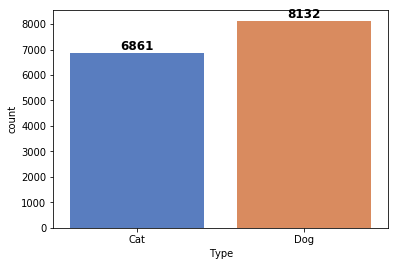

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

g=sns.countplot(x="Type",data=train_ed,palette=sns.color_palette("muted"))
#Turns out cats are listed more on the site
plot_dict={}
val_counts=dict(train_ed["Type"].value_counts().sort_index())
for k,v in val_counts.items():
    if k not in plot_dict:
        plot_dict[val_counts[k]] = val_counts[k]
    else:
        plot_dict[0] = 0
for x in g.patches:
    height = x.get_height()
    g.text(x.get_x() + x.get_width()/2.0,height,plot_dict[height],ha = "center", va = "bottom", fontsize = 8,weight="semibold",size="large")



We can see that more number of dogs are listed on the website.
Now let's see what percentage of Cat/Dog are getting adopted, and at what speed.

In [213]:
#function to create AdoptionSpeed plots using a grouper 
import math
def make_plot (df,grouper,col='AdoptionSpeed',title='',palette = ''):
    g=sns.countplot(x=col,hue=grouper,data=df,palette=palette) 
    g.set_xticklabels(labels = df[col].unique(),rotation=-60,ha='center')
    g.set_ylabel("Number of Adoptions")
    g.set_title(title)
    g.legend(frameon=False)
    sns.set_style({"axes.facecolor":"white"})
##adding annotations
    total_counts_dict = dict(df[grouper].value_counts().sort_index())
    plot_dict={}
   
    for i in df[col].unique():
        val_counts = dict(df.loc[df[col] == i, grouper].value_counts())
        for k,v in val_counts.items():
            if k not in plot_dict:
                plot_dict[val_counts[k]] = (val_counts[k]/total_counts_dict[k])*100
            else:
                plot_dict[0]=0       
    for p in g.patches:
        height = p.get_height()
        if math.isnan(height):
            continue
        g.text(p.get_x()+p.get_width()/2.0,
         height + 0.5,
         f"{plot_dict[height]:.0f}%" , ha = "center", va = "bottom", fontsize = 8,weight="semibold",size="large")
 






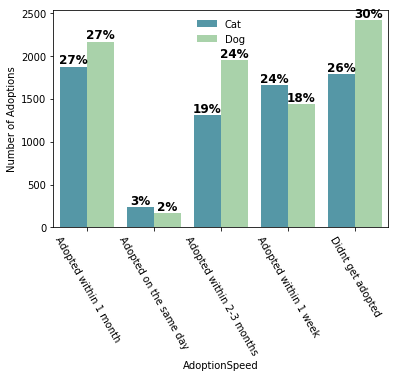

In [214]:
#We can also see which Type gets adopted faster based on given data'        


make_plot(train_ed,"Type",palette=sns.color_palette("Spectral_r"))



Based on the above plot, we can infer that Cat and Dog adoption increases sharply within a week of their listings.
But  a quarter of the total Cats and one-third of the Dogs still remain unadopted. There are other factors to consider like age, health etc as to why this is happening.

Now we can further analyse how Health factors like Vaccinated, Dewormed, Sterilized, Health affected Adoption Speeds.

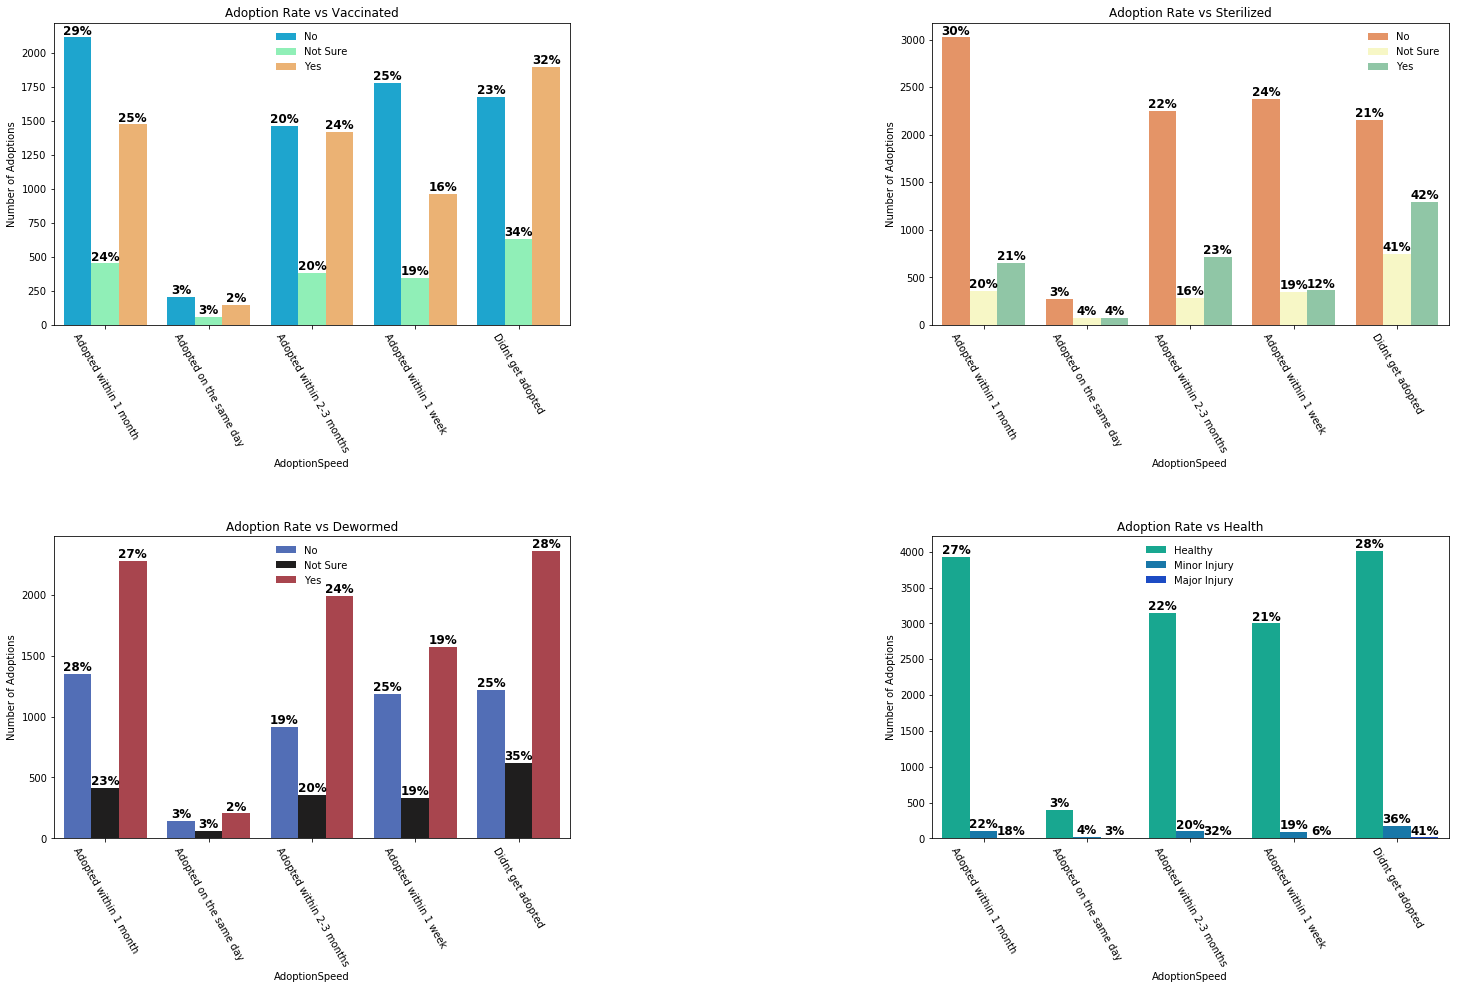

In [215]:
import matplotlib.pyplot as plt1 
plt1.figure(figsize=(25,15))
plt1.subplots_adjust(hspace=0.7,wspace=0.7)
plt1.subplot(2,2,1)
make_plot(df=train_ed,grouper="Vaccinated",title='Adoption Rate vs Vaccinated',palette='rainbow')
plt1.subplot(2,2,2)
make_plot(df=train_ed,grouper="Sterilized",title='Adoption Rate vs Sterilized',palette='Spectral')
plt1.subplot(2,2,3)
make_plot(df=train_ed,grouper="Dewormed",title='Adoption Rate vs Dewormed',palette='icefire')
plt1.subplot(2,2,4)
make_plot(df=train_ed,grouper="Health",title='Adoption Rate vs Health',palette='winter_r')
            
        
    
    

Based on the graphs, we can be sure that animals that are vaccinated in the earlier listing period are less likely to be adopted as compared to animals who aren't vaccinated. 
More than 30% of Dogs who are vaccinated are not even Adopted.
On the other hand, more than 75% of pets who aren't Vaccinated are Adopted.

People tend to prefer non.sterilized pets as we can see that almost 80% are adopted within 90 days of their listing.

It can be considered a general conception that people would prefer Healthy Cats and Dogs, and the data proves it too! 
The number of animals with injuries (Major or Minor) are significantly less and a major chunk of them also don't get adopted.


Now we analyse relationship for MaturitySize and Furlength with AdoptionSpeed.
First we look into MaturitySize for Cats and Dogs individually


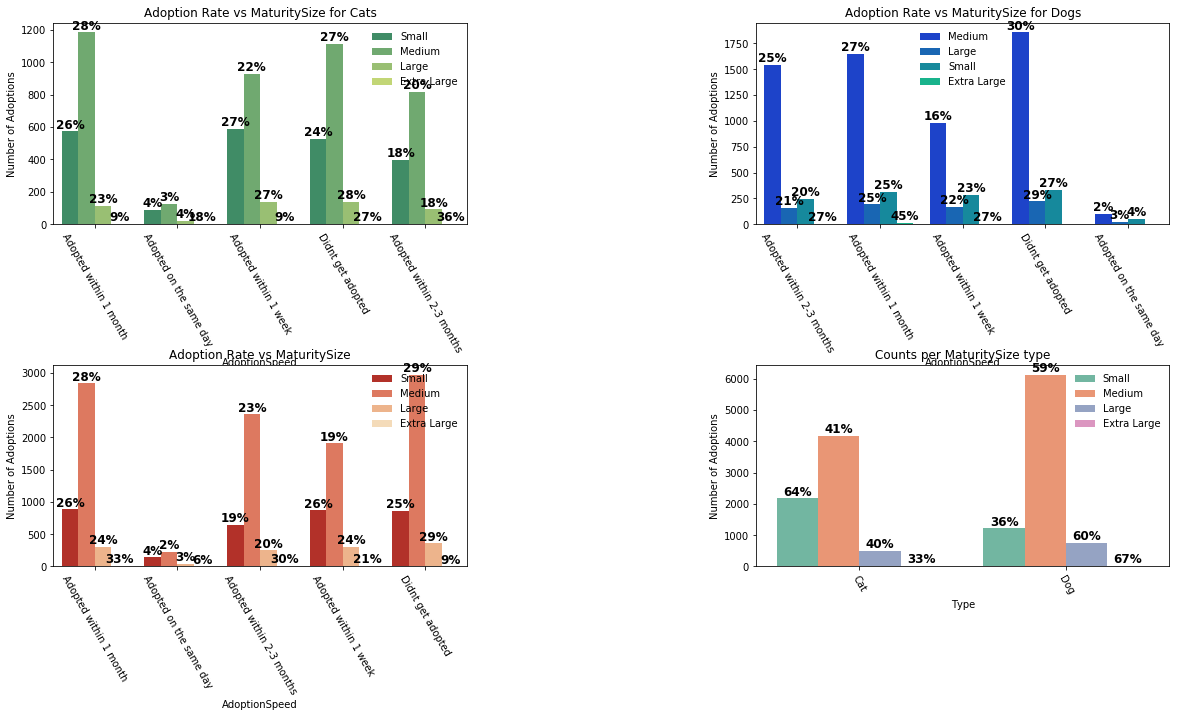

In [216]:
plt1.figure(figsize=(20,10))
plt1.subplots_adjust(hspace=0.7,wspace=0.7)
plt1.subplot(2,2,1)
df=train_ed.loc[train_ed['Type'] == "Cat"]
ax1=make_plot(df=df,grouper="MaturitySize",title='Adoption Rate vs MaturitySize for Cats',palette='summer')

plt1.subplot(2,2,2)
df=train_ed.loc[train_ed['Type'] == "Dog"]
ax2=make_plot(df=df,grouper="MaturitySize",title='Adoption Rate vs MaturitySize for Dogs',palette='winter')

plt1.subplot(2,2,3)

ax2=make_plot(df=train_ed,grouper="MaturitySize",title='Adoption Rate vs MaturitySize',palette='OrRd_r')

plt1.subplot(2,2,4)
ax2=make_plot(df=train_ed,col='Type',grouper='MaturitySize',palette='Set2',title='Counts per MaturitySize type')



There aren't any special observations except the fact that most common Maturity Size is Medium.
So it might be the case that there is bias in the data for number of observations. (Graph 4 shows that **medium** Maturity Size pets are higher in Number )


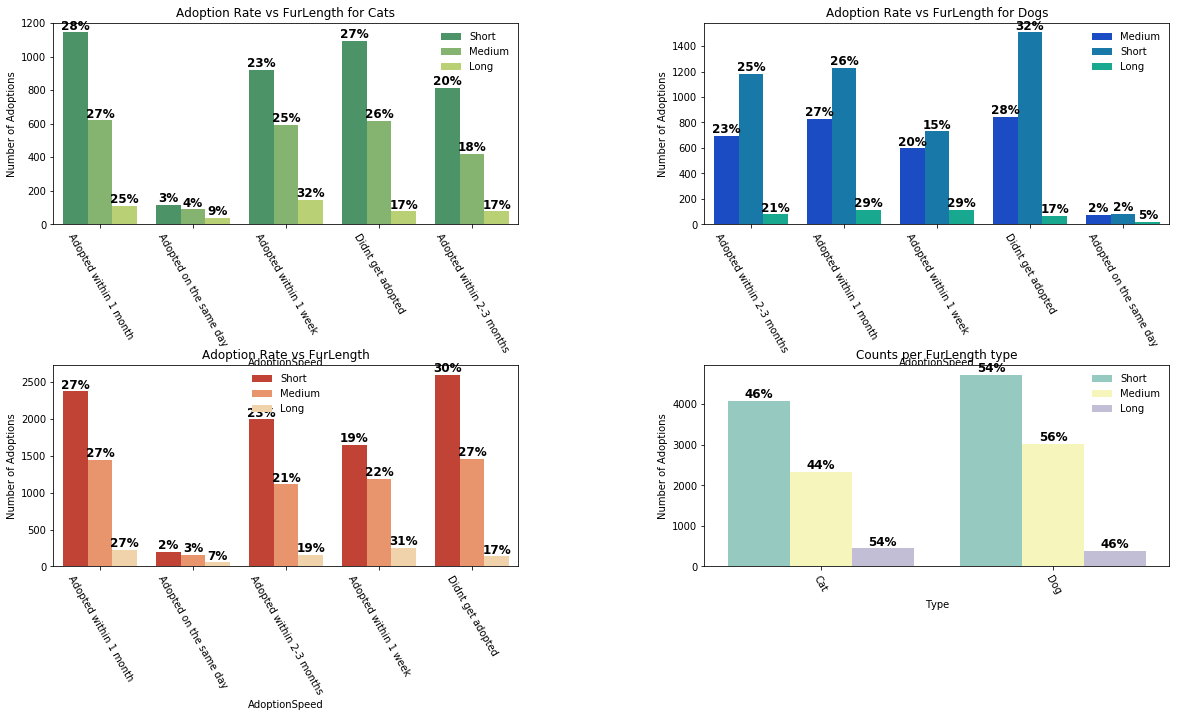

In [217]:
plt1.figure(figsize=(20,10))
plt1.subplots_adjust(hspace=0.7,wspace=0.4)
plt1.subplot(2,2,1)
df=train_ed.loc[train_ed['Type'] == "Cat"]
ax1=make_plot(df=df,grouper="FurLength",title='Adoption Rate vs FurLength for Cats',palette='summer')

plt1.subplot(2,2,2)
df=train_ed.loc[train_ed['Type'] == "Dog"]
ax2=make_plot(df=df,grouper="FurLength",title='Adoption Rate vs FurLength for Dogs',palette='winter')

plt1.subplot(2,2,3)

ax2=make_plot(df=train_ed,grouper="FurLength",title='Adoption Rate vs FurLength',palette='OrRd_r')

plt1.subplot(2,2,4)
ax2 = make_plot(col='Type',grouper='FurLength',df=train_ed,palette='Set3',title='Counts per FurLength type')

Similar observations go for furlength feature **(Short Fur animals are most common in the listings, Hence introducing bias)**
So what we can do is, check for the same bias in the test set.

{1: 1273, 2: 712, 3: 115}

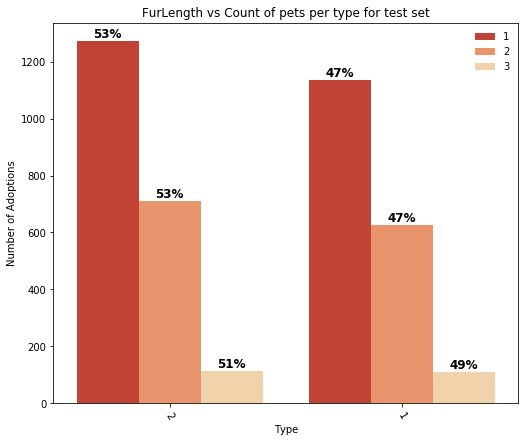

In [218]:
plt1.figure(figsize=(20,7))
plt1.subplots_adjust(hspace=0.7,wspace=0.4)

plt1.subplot(1,2,1)
ax=make_plot(df=test,col='Type',grouper='FurLength',palette='OrRd_r',title='FurLength vs Count of pets per type for test set')

# plt1.subplot(1,2,2)
# ax=make_plot(df=test,col='Type',grouper='MaturitySize',palette='OrRd_r',title='MaturitySize vs Count of pets per type for test set')

#test["MaturitySize".groupby("Type")
for i in test['Type'].unique():
        val_counts = dict(test.loc[test['Type'] == i, 'FurLength'].value_counts())
val_counts    

Same observations are seen, i.e, Medium Sized or Small Furred pets are most common in the listings.
So to prevent bias, we'll have to do PCA or regularization to prevent overfitting in later stages.

We now see the effect of pet color on Adoption Speed

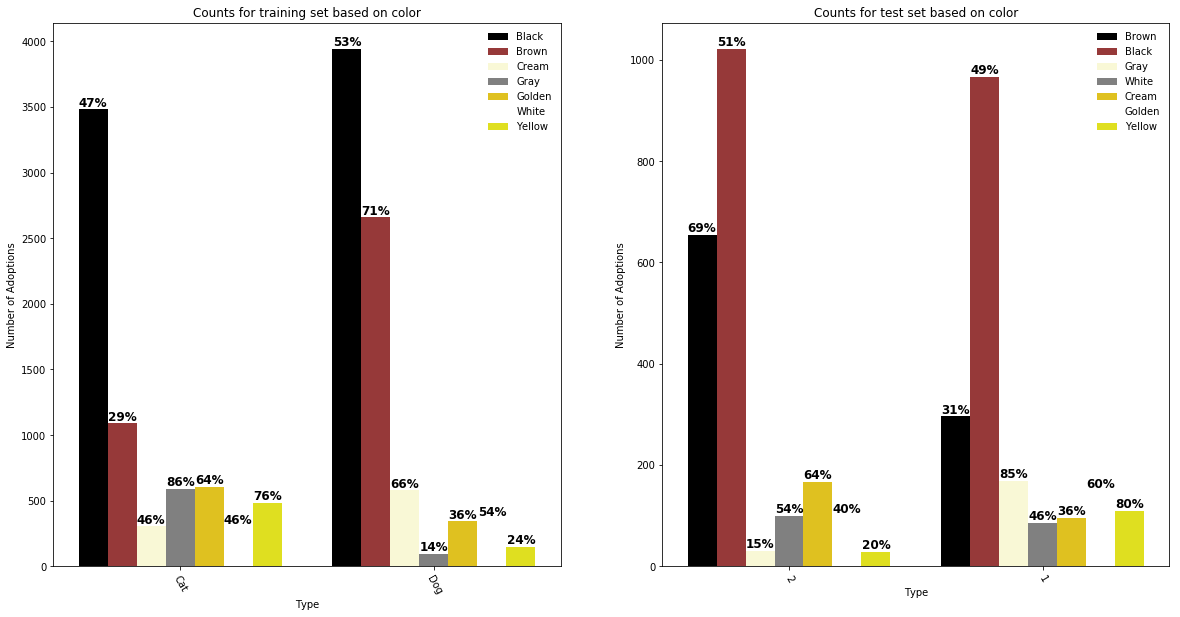

In [219]:
color_labels.rename(columns={'Color3':'ColorID','ColorName3':'ColorName'},inplace = True)
palette_=['Black', 'Brown', '#FFFDD0', 'Gray', 'Gold', 'White', 'Yellow']
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
make_plot(df=train_ed,grouper='ColorName1',palette=palette_,col='Type',title='Counts for training set based on color')
# Now we check for test set
colors_dict = {k: v for k, v in zip(color_labels['ColorID'], color_labels['ColorName'])}
test["ColorName1_"] = test["Color1"].apply(lambda x: colors_dict[x] if x in colors_dict else '')
plt.subplot(1,2,2)
make_plot(df=test,grouper='ColorName1_',palette=palette_,col='Type',title='Counts for test set based on color')



The most common animals in both the datasets are Black and Brown in color.

We can now see how various colors affect adoption speed

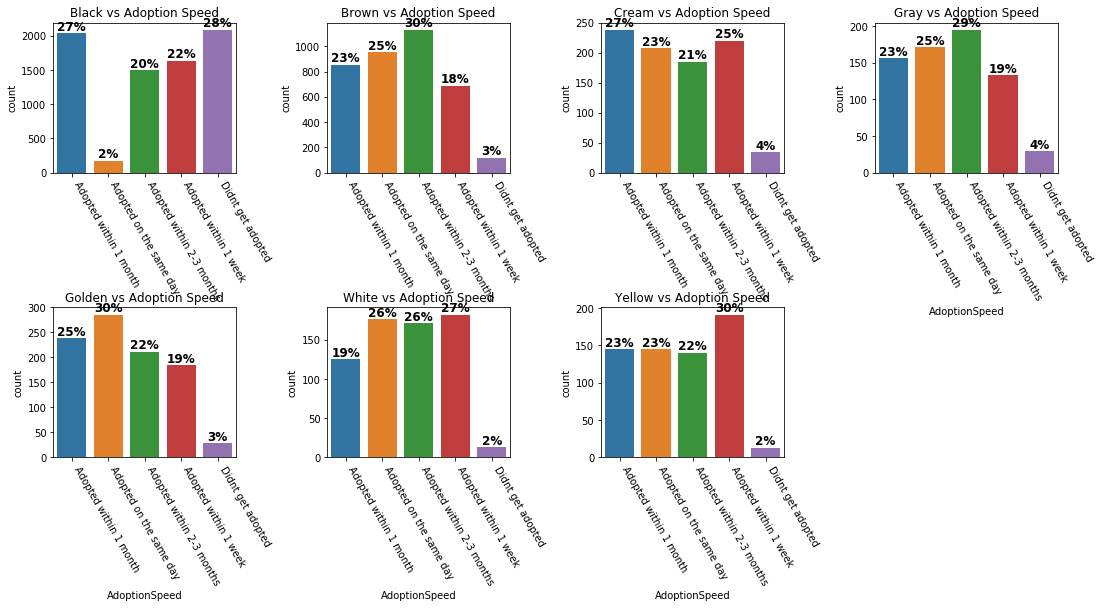

In [220]:
plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace=0.9,wspace = 0.5)
# palette_=['Black', 'Brown', '#FFFDD0', 'Gray', 'Gold', 'White', 'Yellow']
for i,v in enumerate(train_ed["ColorName1"].unique()):
    plt.subplot(2,4,i+1)
    g=sns.countplot(x='AdoptionSpeed',data=train_ed[train_ed["ColorName1"]==v])
    g.set_title(v + " vs Adoption Speed")
    g.set_xticklabels(labels = train_ed["AdoptionSpeed"].unique(),rotation = -60,ha='left')
    colors_dict = dict(train_ed.loc[train_ed["ColorName1"] == v, "AdoptionSpeed"].value_counts())
    plot_dict={}
    for k,v in colors_dict.items():
        if k not in plot_dict:
                plot_dict[colors_dict[k]]=colors_dict[k]/sum(colors_dict.values())*100
        else:
            plot_dict[0]=0
    for x in g.patches:
        height = x.get_height()
        g.text(x.get_x() + x.get_width()/2,height,f"{plot_dict[height]:.0f}%",
               ha='center',va='bottom',fontsize = 8,weight="semibold",size="large")

Even though Black and Brown are the most common colors for pets in the dataset, There are more than 2000 black colored pets who are unadopted.

Let's also analyse AdoptionSpeed across various combinations of animal color. (ColorName1,ColorName2 and ColorName3)

In [221]:
train_ed["All_Colors"] = train_ed["ColorName1"] + train_ed["ColorName2"] + train_ed["ColorName3"]
train_ed["All_Colors"].unique()

array([nan, 'BlackBrownWhite', 'BlackBrownCream', 'BrownCreamGray',
       'BlackGrayWhite', 'BrownCreamWhite', 'GoldenGrayWhite',
       'YellowGrayWhite', 'BlackGoldenWhite', 'BlackGoldenGray',
       'BrownGoldenWhite', 'BlackYellowWhite', 'BrownGoldenYellow',
       'BlackBrownGolden', 'BlackYellowCream', 'YellowCreamWhite',
       'BrownYellowCream', 'GoldenCreamWhite', 'BlackBrownGray',
       'BrownYellowWhite', 'BrownGoldenCream', 'BlackCreamWhite',
       'BlackBrownYellow', 'BrownGrayWhite', 'GoldenYellowWhite',
       'BlackYellowGray', 'CreamGrayWhite', 'BrownGoldenGray',
       'BrownYellowGray', 'GoldenYellowCream', 'YellowCreamGray',
       'BlackGoldenCream', 'GoldenCreamGray', 'BlackCreamGray',
       'BlackGoldenYellow', 'GoldenYellowGray'], dtype=object)

Let's see which colored animals are the highest in number

In [222]:
#Selecting the top 5 values
top_5_colors = train_ed["All_Colors"].value_counts()[:5]
top_5_color = dict(top_5_colors)
top_5_color

{'BlackBrownWhite': 1159,
 'BlackGrayWhite': 449,
 'BlackYellowWhite': 353,
 'BrownCreamWhite': 274,
 'BlackBrownCream': 255}

These are the top 5 colors which are listed in the dataset.
Now let's analyse the effect of Fee on Adoption Speed

In [223]:
sum_fee = train_ed["Fee"].value_counts()[:10]
sum_fee

0      12663
50       468
100      408
200      219
150      162
20       136
300      120
30       103
250       92
1         82
Name: Fee, dtype: int64

In [224]:
print(sum_fee.sum())

14453


As we can see, more than 14,000 pets in the data are bought in under 300 Singapore Dollars. Most of the Animals (Around 12.5k) in the listing who are adopted are free of cost. Let's analyse the Adoption Speed Based on the Fee charged and Type for the Animal

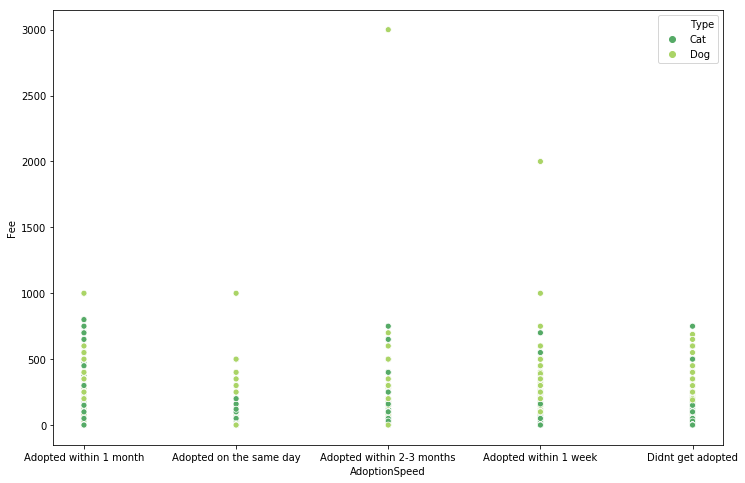

In [225]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='AdoptionSpeed',y='Fee',data=train_ed,palette="summer",hue='Type')

From the plot, it is pretty clear that most pets within fee range below 1000 dollars  are adopted more. There is only 1 dog costing 3000 $ who also is adopted within 2-3 months. This basically means that generally people adopt pets who are mid-range expensive

We now analyse the relationship between Quantity and Fee

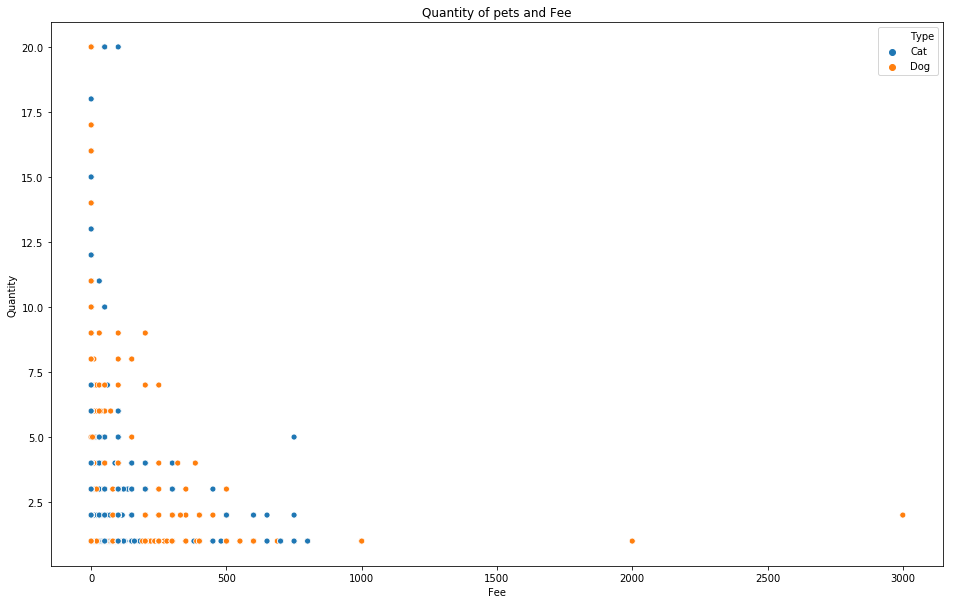

In [226]:
plt.figure(figsize=(16, 10));
sns.scatterplot(x="Fee", y="Quantity", hue="Type",data=train_ed);
plt.title('Quantity of pets and Fee');

Based on the plot, Fees and Quantity have an inverted relationship. Lesser the number of pets, higher is the fee.

In [227]:
train_ed.columns

Index(['Type', 'Name', 'Age', 'Gender', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee',
       'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed', 'StateName', 'MainBreed', 'SecondaryName',
       'ColorName1', 'ColorName2', 'ColorName3', 'All_Colors'],
      dtype='object')

We can check whether age of a pet(Cat or Dog) affects Adoption Speed or not

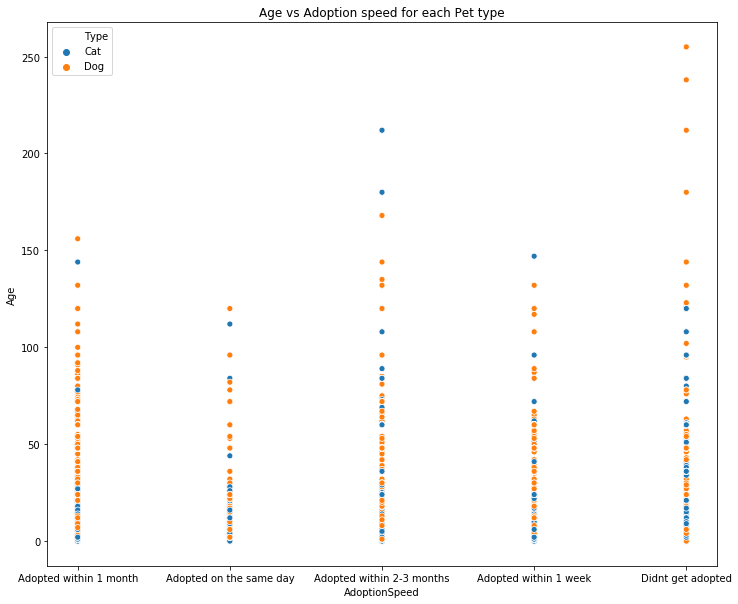

In [228]:
plt.figure(figsize=(12, 10));
sns.scatterplot(x="AdoptionSpeed", y="Age", hue="Type",data=train_ed);
plt.title('Age vs Adoption speed for each Pet type');

Pets are generally adopted within 0-100 month range. A few older cats are adopted too. But there are dogs above 150 months who aren't adopted. As cats live longer than dogs, it would make sense to adopt an older cat than a dog.

In [229]:
train_ed.groupby('MainBreed')["Type"].value_counts().sort_values(ascending=False)


MainBreed                     Type
Mixed Breed                   Dog     5923
Domestic Short Hair           Cat     3634
Domestic Medium Hair          Cat     1258
Tabby                         Cat      342
Domestic Long Hair            Cat      296
Siamese                       Cat      264
Persian                       Cat      221
Labrador Retriever            Dog      205
Shih Tzu                      Dog      189
Poodle                        Dog      167
Terrier                       Dog      161
Golden Retriever              Dog      151
Calico                        Cat      105
German Shepherd Dog           Dog       98
American Shorthair            Cat       94
Beagle                        Dog       90
Spitz                         Dog       89
Rottweiler                    Dog       88
Oriental Short Hair           Cat       73
Bengal                        Cat       71
Schnauzer                     Dog       69
Miniature Pinscher            Dog       67
Jack Russell Terrie

We'll have a look at how top 5 State Names of the pet does/doesn't affect the adoption Speed

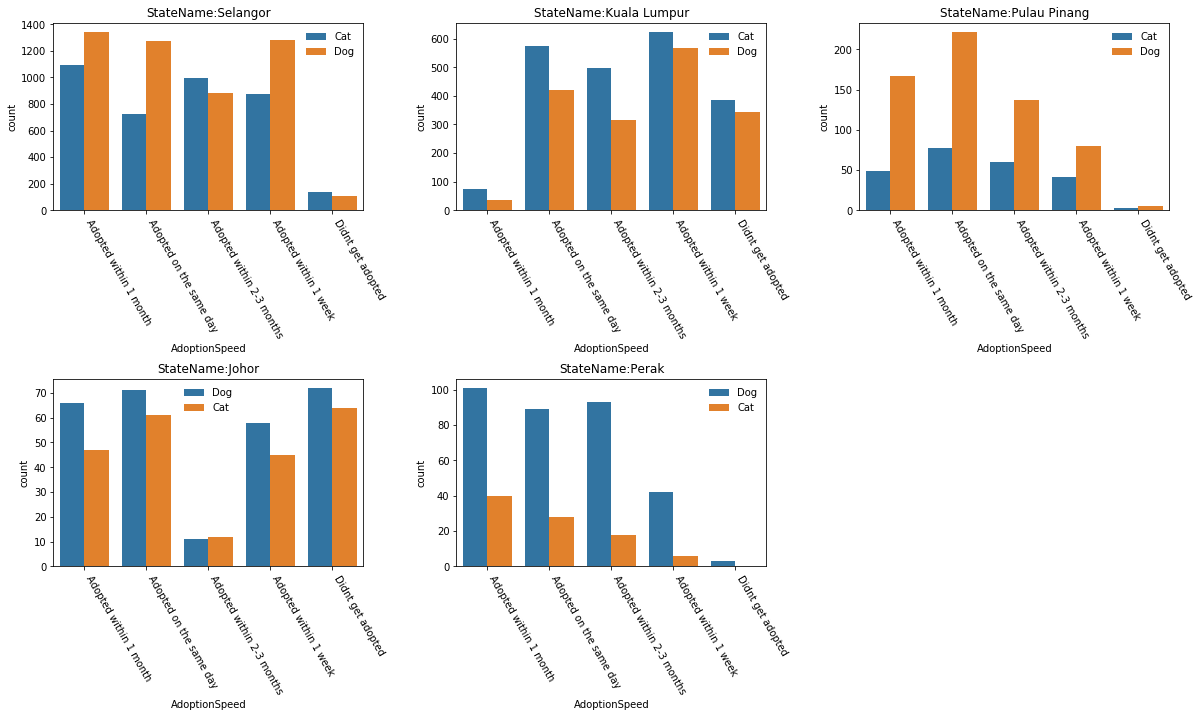

In [230]:
top_5_index= [x for x in train_ed["StateName"].value_counts()[:5].index]
top_5_values= [x for x in train_ed["StateName"].value_counts()[:5].values]
top_5_states = {k:v for k,v in zip(top_5_index,top_5_values)}
plt.figure(figsize = (20,10))
plt.subplots_adjust(hspace = 0.9,wspace = 0.3)
count = 1
for k,v in top_5_states.items():
    plt.subplot(2,3,count)
    g = sns.countplot(x='AdoptionSpeed',data=train_ed[train_ed["StateName"]==k],hue='Type')
    g.set_title("StateName:" + k )
    g.set_xticklabels(labels = train_ed["AdoptionSpeed"].unique(),rotation =-60,ha='left')
    count = count + 1
    g.legend(frameon=False)
    

There aren't any particular insights to this  except the fact that unadopted pets in Kula Lampur are high in number. Plus most of the pets in Selangor, Pulau Pinang nad Perak are adopted.

Next, we look into the various Rescuers.

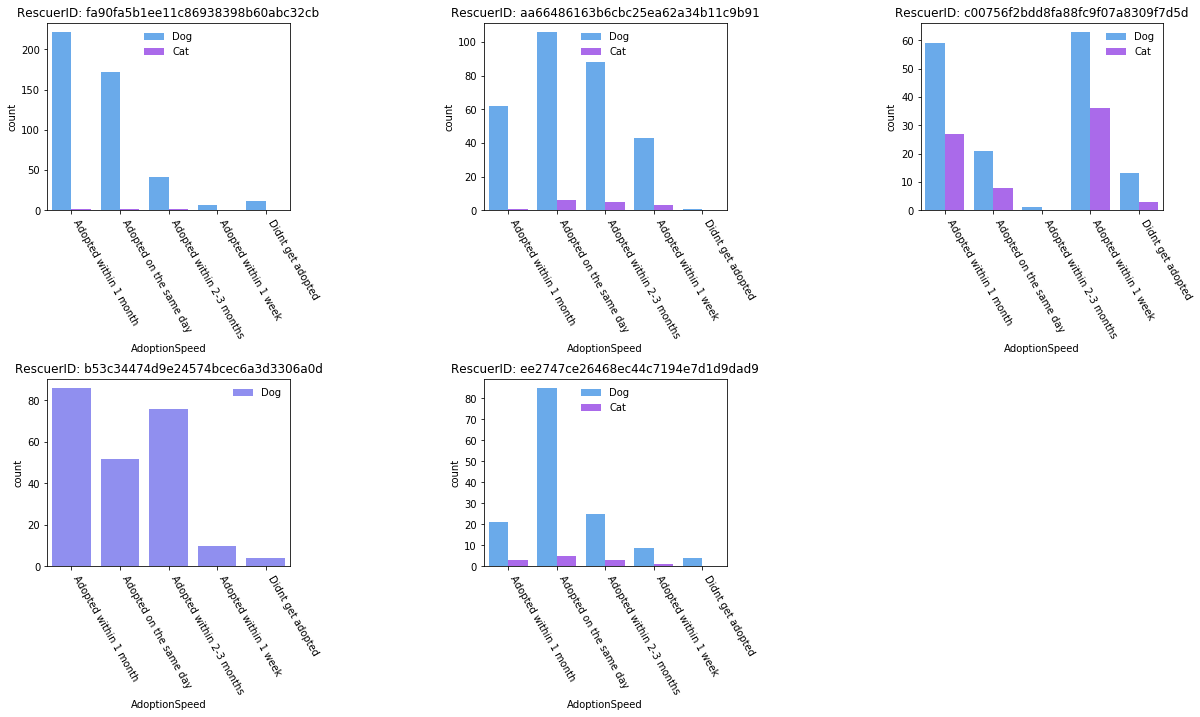

In [231]:
top_5_index= [x for x in train_ed["RescuerID"].value_counts()[:5].index]
top_5_values= [x for x in train_ed["RescuerID"].value_counts()[:5].values]
top_5_rescuers = {k:v for k,v in zip(top_5_index,top_5_values)}
plt.figure(figsize = (20,10))
plt.subplots_adjust(hspace = 0.9,wspace = 0.8)
count = 1
for k,v in top_5_rescuers.items():
    plt.subplot(2,3,count)
    g = sns.countplot(x='AdoptionSpeed',data=train_ed[train_ed["RescuerID"]==k],hue='Type',palette = 'cool')
    g.set_title("RescuerID: " + k )
    g.set_xticklabels(labels = train_ed["AdoptionSpeed"].unique(),rotation =-60,ha='left')
    count = count + 1
    g.legend(frameon=False)


Dogs are rescued generally more in number by the top 5 rescuers. Consequently they are adopted more. One of the rescuers(Plot 4) hasn't even adopted any cats So which would mean that  in most cases, cats who are rescued must be rescued independently. Whereas dogs are rescued by organizations who have high rescue numbers.

Now analysing pet adoption rates based on photos and videos uploaded for the same.

Text(0.5, 1.0, 'Adoption Speed vs Number of Photos Uploaded')

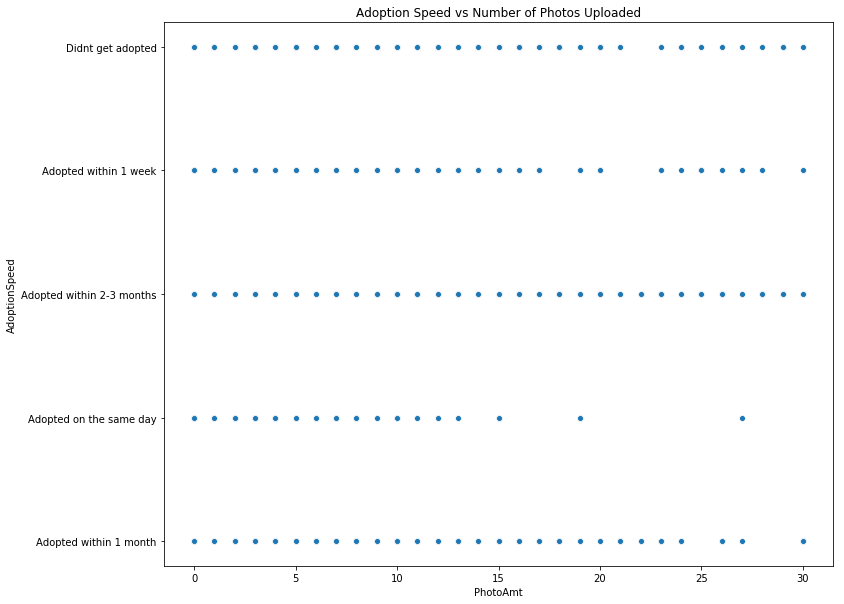

In [232]:
plt.figure(figsize=(12,10))
g=sns.scatterplot(y='AdoptionSpeed',x='PhotoAmt',data=train_ed,palette = 'Green')
g.set_title('Adoption Speed vs Number of Photos Uploaded')

Text(0.5, 1.0, 'Adoption Speed vs Number of Videos Uploaded')

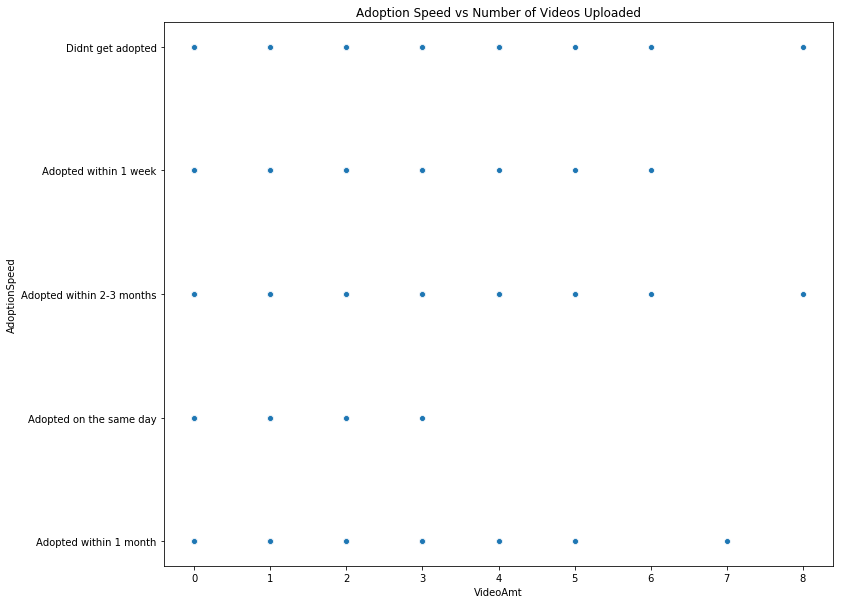

In [233]:
plt.figure(figsize=(12,10))
g=sns.scatterplot(y='AdoptionSpeed',x='VideoAmt',data=train_ed)
g.set_title('Adoption Speed vs Number of Videos Uploaded')

Pets who have less photos/videos uploaded are adopted early(within a week), this might be so because the person adopting wouldn't have taken much time to go over all the photos/videos for pets with higher number for the same. 


Let's import the metadata, image and the sentiment data

In [234]:
train_image_files = sorted(glob.glob('../input/train_images/*.jpg'))
train_metadata_files = sorted(glob.glob('../input/train_metadata/*.json'))
train_sentiment_files = sorted(glob.glob('../input/train_sentiment/*.json'))

print('num of train images files: {}'.format(len(train_image_files)))
print('num of train metadata files: {}'.format(len(train_metadata_files)))
print('num of train sentiment files: {}'.format(len(train_sentiment_files)))


test_image_files = sorted(glob.glob('../input/test_images/*.jpg'))
test_metadata_files = sorted(glob.glob('../input/test_metadata/*.json'))
test_sentiment_files = sorted(glob.glob('../input/test_sentiment/*.json'))

print('num of test images files: {}'.format(len(test_image_files)))
print('num of test metadata files: {}'.format(len(test_metadata_files)))
print('num of test sentiment files: {}'.format(len(test_sentiment_files)))

num of train images files: 58311
num of train metadata files: 58311
num of train sentiment files: 14442
num of test images files: 14465
num of test metadata files: 14465
num of test sentiment files: 3865


Let's get an idea of what the number of pets are in train and test sets in terms of Sentiment, Metadata and images so that we can add them to main Dataframe for adding features.

In [235]:
#Train Set

#Sentiment
train_sentiment_df = pd.DataFrame(train_sentiment_files,columns={'File'})
train_sentiment_df["PetID"] = train_sentiment_df["File"].apply(lambda x : x.split("/")[-1].split('.')[0])
print("Number of pets with sentiments {}" .format(len(train_sentiment_df["PetID"].unique())) )
pets_with_sentiments = len(np.intersect1d(train_sentiment_df["PetID"].unique(),train_ed["PetID"].unique()))
print("fraction of pets with sentiments {:.4f}".format(pets_with_sentiments/len(train_ed["PetID"])))

#Images

train_image_df = pd.DataFrame(train_image_files,columns={'File'})
train_image_df["PetID"] = train_image_df["File"].apply(lambda x : x.split("/")[-1].split('.')[0].split('-')[0])
print("Number of pets with images {}" .format(len(train_image_df["PetID"].unique())) )
pets_with_images = len(np.intersect1d(train_image_df["PetID"].unique(),train_ed["PetID"].unique()))
print("fraction of pets with images {:.4f}".format(pets_with_images/len(train_ed["PetID"])))

#Metadata
train_metadata_df = pd.DataFrame(train_metadata_files,columns={'File'})
train_metadata_df["PetID"] = train_metadata_df["File"].apply(lambda x : x.split("/")[-1].split('.')[0].split('-')[0])
print("Number of pets with metadata {}" .format(len(train_metadata_df["PetID"].unique())) )
pets_with_metadata = len(np.intersect1d(train_metadata_df["PetID"].unique(),train_ed["PetID"].unique()))
print("fraction of pets with metadata {:.4f}".format(pets_with_metadata/len(train_ed["PetID"])))




Number of pets with sentiments 14442
fraction of pets with sentiments 0.9632
Number of pets with images 14652
fraction of pets with images 0.9773
Number of pets with metadata 14652
fraction of pets with metadata 0.9773


In [236]:
#Test Set

#Sentiment
test_sentiment_df = pd.DataFrame(test_sentiment_files,columns={'File'})
test_sentiment_df["PetID"] = test_sentiment_df["File"].apply(lambda x : x.split("/")[-1].split('.')[0])
print("Number of pets with sentiments {}" .format(len(test_sentiment_df["PetID"].unique())) )
pets_with_sentiments = len(np.intersect1d(test_sentiment_df["PetID"].unique(),test["PetID"].unique()))
print("fraction of pets with sentiments {:.4f}".format(pets_with_sentiments/len(test["PetID"])))

#Images

test_image_df = pd.DataFrame(test_image_files,columns={'File'})
test_image_df["PetID"] = test_image_df["File"].apply(lambda x : x.split("/")[-1].split('.')[0].split('-')[0])
print("Number of pets with images {}" .format(len(test_image_df["PetID"].unique())) )
pets_with_images = len(np.intersect1d(test_image_df["PetID"].unique(),test["PetID"].unique()))
print("fraction of pets with images {:.4f}".format(pets_with_images/len(test["PetID"])))

#Metadata
test_metadata_df = pd.DataFrame(test_metadata_files,columns={'File'})
test_metadata_df["PetID"] = test_metadata_df["File"].apply(lambda x : x.split("/")[-1].split('.')[0].split('-')[0])
print("Number of pets with metadata {}" .format(len(test_metadata_df["PetID"].unique())) )
pets_with_metadata = len(np.intersect1d(test_metadata_df["PetID"].unique(),test["PetID"].unique()))
print("fraction of pets with metadata {:.4f}".format(pets_with_metadata/len(test["PetID"])))


Number of pets with sentiments 3865
fraction of pets with sentiments 0.9731
Number of pets with images 3858
fraction of pets with images 0.9713
Number of pets with metadata 3858
fraction of pets with metadata 0.9713


So now it's safe to assume that we can extract features from json as well as jpg files

In [237]:
import json
#opening the json file:
def open_sentiment_file(file):
    with open(file, 'r') as f:
        sentiment_file = json.load(f)
    return sentiment_file

def open_metadata_file(file):
    with open(file,'r') as f:
        metadata_file = json.load(f)
    return metadata_file


def get_sentiment_features(file):
    file_content = [x["text"]["content"] for x in file["sentences"]]
    file_content =  "".join(file_content)
    file_entities = [x['name'] for x in file['entities']]
    file_entities = " ".join(file_entities)
    sentences_sentiment = [x["sentiment"] for x in file["sentences"]]
    file_sentiment_df = pd.DataFrame.from_dict(sentences_sentiment,orient = 'columns').sum()
    file_sentiment_df = file_sentiment_df.to_dict()
    sentiment_df = pd.DataFrame.from_dict(file_sentiment_df,orient = 'index').T
    sentiment_df["Entities"] = file_entities
    sentiment_df["Description"] = file_content 
    
    return sentiment_df    


def get_metadata_features(file):
    if 'labelAnnotations' in list(file.keys()):
        file_score = np.mean([x['score'] for x in file['labelAnnotations']])
        file_top_desc = [x['description'] for x in file['labelAnnotations']]
    else:
        file_score = np.nan
        file_top_desc = ['']
    color_ = file['imagePropertiesAnnotation']['dominantColors']['colors'] 
    color_score = np.mean([x['score'] for x in color_])
    color_pixelfraction = np.mean([x['pixelFraction'] for x in color_])
    crop_ = file['cropHintsAnnotation']['cropHints']
    confidence = np.mean([x['confidence'] for x in crop_])
    if 'importanceFraction' in crop_[0].keys():
        imp_fraction = np.mean([x['importanceFraction'] for x in crop_])
    else:
        imp_fraction = np.nan
    
    metadata_df = {'score':file_score,
                  'color_score': color_score,
                  'color_pixelfraction':color_pixelfraction,
                  'confidence':confidence,
                  'imp_fraction':imp_fraction,
                   'annots_top_desc':" ".join(file_top_desc)
                  }
    metadata_df = pd.DataFrame.from_dict(metadata_df,orient = 'index').T
    return metadata_df
    

#Final Function for extracting features from metadata and sentiment files
def extract_features(sentiment_files,metadata_files):
    final_metadata_df = pd.DataFrame()
    final_sentiment_df = pd.DataFrame()
    metadata_petid = []
    sentiment_petid = []
    for i in metadata_files:
        f = open_metadata_file(i)
        df = get_metadata_features(f)    
        final_metadata_df = pd.concat([final_metadata_df,df],ignore_index = True)
        pet = i.split('/')[-1].split('.')[0].split('-')[0]
        metadata_petid.append(pet)
    final_metadata_df["PetID"] = metadata_petid
        
    for i in sentiment_files:
        f = open_sentiment_file(i)
        df = get_sentiment_features(f)    
        final_sentiment_df = pd.concat([final_sentiment_df,df],ignore_index = True)
        pet = i.split('/')[-1].split('.')[0]
        sentiment_petid.append(pet)
    final_sentiment_df["PetID"] = sentiment_petid
        
    dfs = [final_sentiment_df,final_metadata_df]
    return dfs
dfs_train = extract_features(train_sentiment_files,train_metadata_files)
print(dfs_train[0].shape,dfs_train[1].shape)




(14442, 5) (58311, 7)


In [238]:
dfs_test = extract_features(test_sentiment_files,test_metadata_files)
print(dfs_test[0].shape,dfs_test[1].shape)

(3865, 5) (14465, 7)


In [239]:
dfs_train[0].head()

,magnitude,score,Entities,Description,PetID
0,2.6,2.6,Ollie construction site house manja type playm...,Ollie was rescued from the construction site b...,0008c5398
1,0.6,0.6,restaurant puppies beach Call teluk kumba Adop...,went to teluk kumba kuanthai restaurant saw th...,000a290e4
2,0.7,0.7,puppy pound DBKL home puppy,This puppy rescued from DBKL pound last wednes...,000fb9572
3,0.8,0.8,,He is cute and fun to be with.,0011d7c25
4,1.7,0.1,Pup brothers condition vet shots home round va...,I found Pup with 2 other brothers who were aba...,00156db4a


We can now see that Metadata dataframe has multiple numerical feature values for 1 pet ID, So we can perform some mathematical operations for aggregation purposes.

In [240]:
metadata_train_df = dfs_train[1]
metadata_test_df = dfs_test[1]
sentiment_train_df = dfs_train[0]
sentiment_test_df = dfs_test[0]




In [241]:
#Train
#Metadata
metadata_train_desc = metadata_train_df.groupby(['PetID'])['annots_top_desc'].unique()
metadata_train_desc = metadata_train_desc.reset_index()
metadata_train_desc[
    'annots_top_desc'] = metadata_train_desc[
    'annots_top_desc'].apply(lambda x: ' '.join(x))
metadata_train_grouper= metadata_train_df.drop(["annots_top_desc"],axis = 1)
for i in metadata_train_grouper.columns:
    if 'PetID' not in i :
        metadata_train_grouper[i]=metadata_train_grouper[i].astype('float')
metadata_train_grouper = metadata_train_grouper.groupby("PetID").agg(['mean','sum'])
metadata_train_grouper.columns = pd.Index(['{}_{}_{}'.format('metadata',x[0],x[1].upper()) for x in metadata_train_grouper.columns ])

 #Sentiment
    
sentiment_train_desc = sentiment_train_df[["Entities","PetID"]]
#     'Entities'] = sentiment_train_desc[
#     'Entities'].apply(lambda x: ' '.join(x))
sentiment_train_grouper= sentiment_train_df.drop(["Entities","Description"],axis = 1)
for i in sentiment_train_grouper.columns:
    if 'PetID' not in i :
        sentiment_train_grouper[i]=sentiment_train_grouper[i].astype('float')
sentiment_train_grouper = sentiment_train_grouper.groupby("PetID").agg(['mean','sum'])
sentiment_train_grouper.columns = pd.Index(['{}_{}_{}'.format('sentiment',x[0],x[1].upper()) for x in sentiment_train_grouper.columns ])

        
#Test   
metadata_test_desc = metadata_test_df.groupby(['PetID'])['annots_top_desc'].unique()
metadata_test_desc = metadata_test_desc.reset_index()
metadata_test_desc[
    'annots_top_desc'] = metadata_test_desc[
    'annots_top_desc'].apply(lambda x: ' '.join(x))
metadata_test_grouper= metadata_test_df.drop(["annots_top_desc"],axis = 1)
for i in metadata_test_grouper.columns:
    if 'PetID' not in i :
        metadata_test_grouper[i]=metadata_test_grouper[i].astype('float')
metadata_test_grouper = metadata_test_grouper.groupby("PetID").agg(['mean','sum'])
metadata_test_grouper.columns = pd.Index(['{}_{}_{}'.format('metadata',x[0],x[1].upper()) for x in metadata_test_grouper.columns ])

 #Sentiment
    
sentiment_test_desc = sentiment_test_df[["Entities","PetID"]]
# sentiment_test_desc.reset_index()
# sentiment_test_desc[
#     'Entities'] = sentiment_test_desc[
#     'Entities'].apply(lambda x: ' '.join(x))
sentiment_test_grouper= sentiment_test_df.drop(["Entities","Description"],axis = 1)
for i in sentiment_test_grouper.columns:
    if 'PetID' not in i :
        sentiment_test_grouper[i]=sentiment_test_grouper[i].astype('float')
sentiment_test_grouper = sentiment_test_grouper.groupby("PetID").agg(['mean','sum'])
sentiment_test_grouper.columns = pd.Index(['{}_{}_{}'.format('sentiment',x[0],x[1].upper()) for x in sentiment_test_grouper.columns ])



Now we can merge the extracted features with our initial Training data as well as test data
        

In [242]:
#Train 

train_final = train.copy()
train_final = train_final.merge(metadata_train_grouper,on='PetID',how = 'left')
train_final = train_final.merge(sentiment_train_grouper,on='PetID',how = 'left')
train_final = train_final.merge(metadata_train_desc,on='PetID',how = 'left')
train_final = train_final.merge(sentiment_train_desc,on='PetID',how = 'left')

#Test
 
test_final = test.copy()
test_final = test_final.merge(metadata_test_grouper,on='PetID',how = 'left')
test_final = test_final.merge(sentiment_test_grouper,on='PetID',how = 'left')
test_final = test_final.merge(metadata_test_desc,on='PetID',how = 'left')
test_final = test_final.merge(sentiment_test_desc,on='PetID',how = 'left')

print(train_final.shape)
print(test_final.shape)


(14993, 40)
(3972, 40)


We can now join train and test dataset and do some feature engineering.

In [243]:
X = pd.concat([train_final,test_final],ignore_index=True,sort=False)


In [244]:
print("NaN structure is: ", X.isna().sum())

NaN structure is:  Type                                     0
Name                                  1668
Age                                      0
Breed1                                   0
Breed2                                   0
Gender                                   0
Color1                                   0
Color2                                   0
Color3                                   0
MaturitySize                             0
FurLength                                0
Vaccinated                               0
Dewormed                                 0
Sterilized                               0
Health                                   0
Quantity                                 0
Fee                                      0
State                                    0
RescuerID                                0
VideoAmt                                 0
Description                             13
PetID                                    0
PhotoAmt                           

In [245]:
col_types = X.dtypes
print("Integer columns: ",col_types[col_types=='int'])
print("Float Columns: ",col_types[col_types=='float'])
print("Categorical Columns: ",col_types[col_types=='object'])


Integer columns:  Type            int64
Age             int64
Breed1          int64
Breed2          int64
Gender          int64
Color1          int64
Color2          int64
Color3          int64
MaturitySize    int64
FurLength       int64
Vaccinated      int64
Dewormed        int64
Sterilized      int64
Health          int64
Quantity        int64
Fee             int64
State           int64
VideoAmt        int64
dtype: object
Float Columns:  PhotoAmt                             float64
AdoptionSpeed                        float64
metadata_score_MEAN                  float64
metadata_score_SUM                   float64
metadata_color_score_MEAN            float64
metadata_color_score_SUM             float64
metadata_color_pixelfraction_MEAN    float64
metadata_color_pixelfraction_SUM     float64
metadata_confidence_MEAN             float64
metadata_confidence_SUM              float64
metadata_imp_fraction_MEAN           float64
metadata_imp_fraction_SUM            float64
sentiment_magnit

In [246]:
X_temp = X.copy()
# Count RescuerID occurrences:
rescuer_count = X.groupby(['RescuerID'])['PetID'].count().reset_index()
rescuer_count.columns = ['RescuerID', 'RescuerID_COUNT']

# Merge as another feature onto main DF:
X_temp = X_temp.merge(rescuer_count, how='left', on='RescuerID')

In [247]:
text_columns = ['Description','Entities','annots_top_desc']
#PetID won't make relevance as a feature
#RescuerID will be dropped as one more feature will be made using this in the coming markdown
#Names are all unique in the dataset, hence it makes no sense to keep it as a feature
to_drop_columns = ['PetID','RescuerID','Name']

In [248]:

X_text = X_temp[text_columns]

for i in X_text.columns:
    X_text.loc[:, i] = X_text.loc[:, i].fillna('<MISSING>')

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


Reference for below code: https://www.kaggle.com/wrosinski/baselinemodeling

In [249]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import SparsePCA, TruncatedSVD, LatentDirichletAllocation, NMF

n_components = 5
text_features = []


# Generate text features:
for i in X_text.columns:
    
    # Initialize decomposition methods:
    print('generating features from: {}'.format(i))
    svd_ = TruncatedSVD(
        n_components=n_components, random_state=1337)
    nmf_ = NMF(
        n_components=n_components, random_state=1337)
    
    tfidf_col = TfidfVectorizer().fit_transform(X_text.loc[:, i].values)
    svd_col = svd_.fit_transform(tfidf_col)
    svd_col = pd.DataFrame(svd_col)
    svd_col = svd_col.add_prefix('SVD_{}_'.format(i))
    
    nmf_col = nmf_.fit_transform(tfidf_col)
    nmf_col = pd.DataFrame(nmf_col)
    nmf_col = nmf_col.add_prefix('NMF_{}_'.format(i))
    
    text_features.append(svd_col)
    text_features.append(nmf_col)

    
# Combine all extracted features:
text_features = pd.concat(text_features, axis=1)

# Concatenate with main DF:
X_temp = pd.concat([X_temp, text_features], axis=1)

# Remove raw text columns:
for i in X_text.columns:
    X_temp = X_temp.drop(i, axis=1)

generating features from: Description
generating features from: Entities
generating features from: annots_top_desc


In [250]:
X_temp.shape

(18965, 69)

In [251]:
X_temp = X_temp.drop(to_drop_columns,axis = 1)
X_temp = X_temp.drop('ColorName1_',axis = 1)



Now we can divide our dataset into test and training set

In [252]:
# Split into train and test again:
X_train = X_temp.loc[np.isfinite(X_temp.AdoptionSpeed), :]
X_test = X_temp.loc[~np.isfinite(X_temp.AdoptionSpeed), :]

# Remove missing target column from test:
X_test = X_test.drop(['AdoptionSpeed'], axis=1)


print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

assert X_train.shape[0] == train.shape[0]
assert X_test.shape[0] == test.shape[0]


# Check if columns between the two DFs are the same:
train_cols = X_train.columns.tolist()
train_cols.remove('AdoptionSpeed')

test_cols = X_test.columns.tolist()

assert np.all(train_cols == test_cols)

X_train shape: (14993, 65)
X_test shape: (3972, 64)


In [253]:
np.sum(X_train.isnull())

Type                                   0
Age                                    0
Breed1                                 0
Breed2                                 0
Gender                                 0
Color1                                 0
Color2                                 0
Color3                                 0
MaturitySize                           0
FurLength                              0
Vaccinated                             0
Dewormed                               0
Sterilized                             0
Health                                 0
Quantity                               0
Fee                                    0
State                                  0
VideoAmt                               0
PhotoAmt                               0
AdoptionSpeed                          0
metadata_score_MEAN                  341
metadata_score_SUM                   341
metadata_color_score_MEAN            341
metadata_color_score_SUM             341
metadata_color_p

In [254]:
np.sum(X_test.isnull())

Type                                   0
Age                                    0
Breed1                                 0
Breed2                                 0
Gender                                 0
Color1                                 0
Color2                                 0
Color3                                 0
MaturitySize                           0
FurLength                              0
Vaccinated                             0
Dewormed                               0
Sterilized                             0
Health                                 0
Quantity                               0
Fee                                    0
State                                  0
VideoAmt                               0
PhotoAmt                               0
metadata_score_MEAN                  114
metadata_score_SUM                   114
metadata_color_score_MEAN            114
metadata_color_score_SUM             114
metadata_color_pixelfraction_MEAN    114
metadata_color_p

In [255]:
import scipy as sp

from collections import Counter
from functools import partial
from math import sqrt

from sklearn.metrics import cohen_kappa_score, mean_squared_error
from sklearn.metrics import confusion_matrix as sk_cmatrix


# FROM: https://www.kaggle.com/myltykritik/simple-lgbm-image-features

# The following 3 functions have been taken from Ben Hamner's github repository
# https://github.com/benhamner/Metrics
def confusion_matrix(rater_a, rater_b, min_rating=None, max_rating=None):
    """
    Returns the confusion matrix between rater's ratings
    """
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(rater_a + rater_b)
    if max_rating is None:
        max_rating = max(rater_a + rater_b)
    num_ratings = int(max_rating - min_rating + 1)
    conf_mat = [[0 for i in range(num_ratings)]
                for j in range(num_ratings)]
    for a, b in zip(rater_a, rater_b):
        conf_mat[a - min_rating][b - min_rating] += 1
    return conf_mat


def histogram(ratings, min_rating=None, max_rating=None):
    """
    Returns the counts of each type of rating that a rater made
    """
    if min_rating is None:
        min_rating = min(ratings)
    if max_rating is None:
        max_rating = max(ratings)
    num_ratings = int(max_rating - min_rating + 1)
    hist_ratings = [0 for x in range(num_ratings)]
    for r in ratings:
        hist_ratings[r - min_rating] += 1
    return hist_ratings


def quadratic_weighted_kappa(y, y_pred):
    """
    Calculates the quadratic weighted kappa
    axquadratic_weighted_kappa calculates the quadratic weighted kappa
    value, which is a measure of inter-rater agreement between two raters
    that provide discrete numeric ratings.  Potential values range from -1
    (representing complete disagreement) to 1 (representing complete
    agreement).  A kappa value of 0 is expected if all agreement is due to
    chance.
    quadratic_weighted_kappa(rater_a, rater_b), where rater_a and rater_b
    each correspond to a list of integer ratings.  These lists must have the
    same length.
    The ratings should be integers, and it is assumed that they contain
    the complete range of possible ratings.
    quadratic_weighted_kappa(X, min_rating, max_rating), where min_rating
    is the minimum possible rating, and max_rating is the maximum possible
    rating
    """
    rater_a = y
    rater_b = y_pred
    min_rating=None
    max_rating=None
    rater_a = np.array(rater_a, dtype=int)
    rater_b = np.array(rater_b, dtype=int)
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(min(rater_a), min(rater_b))
    if max_rating is None:
        max_rating = max(max(rater_a), max(rater_b))
    conf_mat = confusion_matrix(rater_a, rater_b,
                                min_rating, max_rating)
    num_ratings = len(conf_mat)
    num_scored_items = float(len(rater_a))

    hist_rater_a = histogram(rater_a, min_rating, max_rating)
    hist_rater_b = histogram(rater_b, min_rating, max_rating)

    numerator = 0.0
    denominator = 0.0

    for i in range(num_ratings):
        for j in range(num_ratings):
            expected_count = (hist_rater_a[i] * hist_rater_b[j]
                              / num_scored_items)
            d = pow(i - j, 2.0) / pow(num_ratings - 1, 2.0)
            numerator += d * conf_mat[i][j] / num_scored_items
            denominator += d * expected_count / num_scored_items

    return (1.0 - numerator / denominator)

class OptimizedRounder(object):
    def __init__(self):
        self.coef_ = 0

    def _kappa_loss(self, coef, X, y):
        X_p = np.copy(X)
        for i, pred in enumerate(X_p):
            if pred < coef[0]:
                X_p[i] = 0
            elif pred >= coef[0] and pred < coef[1]:
                X_p[i] = 1
            elif pred >= coef[1] and pred < coef[2]:
                X_p[i] = 2
            elif pred >= coef[2] and pred < coef[3]:
                X_p[i] = 3
            else:
                X_p[i] = 4

        ll = quadratic_weighted_kappa(y, X_p)
        return -ll

    def fit(self, X, y):
        loss_partial = partial(self._kappa_loss, X=X, y=y)
        initial_coef = [0.5, 1.5, 2.5, 3.5]
        self.coef_ = sp.optimize.minimize(loss_partial, initial_coef, method='nelder-mead')

    def predict(self, X, coef):
        X_p = np.copy(X)
        for i, pred in enumerate(X_p):
            if pred < coef[0]:
                X_p[i] = 0
            elif pred >= coef[0] and pred < coef[1]:
                X_p[i] = 1
            elif pred >= coef[1] and pred < coef[2]:
                X_p[i] = 2
            elif pred >= coef[2] and pred < coef[3]:
                X_p[i] = 3
            else:
                X_p[i] = 4
        return X_p

    def coefficients(self):
        return self.coef_['x']
    
def rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

In [256]:
import lightgbm as lgb

params = {'application': 'regression',
          'boosting': 'gbdt',
          'metric': 'rmse',
          'num_leaves': 70,
          'max_depth': 9,
          'learning_rate': 0.01,
          'bagging_fraction': 0.85,
          'feature_fraction': 0.8,
          'min_split_gain': 0.02,
          'min_child_samples': 150,
          'min_child_weight': 0.02,
          'lambda_l2': 0.0475,
          'verbosity': -1,
          'data_random_seed': 17}

# Additional parameters:
early_stop = 500
verbose_eval = 100
num_rounds = 10000
n_splits = 5

In [257]:
from sklearn.model_selection import StratifiedKFold


kfold = StratifiedKFold(n_splits=n_splits, random_state=1337)


oof_train = np.zeros((X_train.shape[0]))
oof_test = np.zeros((X_test.shape[0], n_splits))


i = 0
for train_index, valid_index in kfold.split(X_train, X_train['AdoptionSpeed'].values):
    
    X_tr = X_train.iloc[train_index, :]
    X_val = X_train.iloc[valid_index, :]
    
    y_tr = X_tr['AdoptionSpeed'].values
    X_tr = X_tr.drop(['AdoptionSpeed'], axis=1)
    
    y_val = X_val['AdoptionSpeed'].values
    X_val = X_val.drop(['AdoptionSpeed'], axis=1)
    
    print('\ny_tr distribution: {}'.format(Counter(y_tr)))
    
    d_train = lgb.Dataset(X_tr, label=y_tr)
    d_valid = lgb.Dataset(X_val, label=y_val)
    watchlist = [d_train, d_valid]
    
    print('training LGB:')
    model = lgb.train(params,
                      train_set=d_train,
                      num_boost_round=num_rounds,
                      valid_sets=watchlist,
                      verbose_eval=verbose_eval,
                      early_stopping_rounds=early_stop)
    
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    test_pred = model.predict(X_test, num_iteration=model.best_iteration)
    
    oof_train[valid_index] = val_pred
    oof_test[:, i] = test_pred
    
    i += 1


y_tr distribution: Counter({4.0: 3357, 2.0: 3229, 3.0: 2607, 1.0: 2472, 0.0: 328})
training LGB:
Training until validation scores don't improve for 500 rounds.
[100]	training's rmse: 1.05967	valid_1's rmse: 1.09636
[200]	training's rmse: 1.00644	valid_1's rmse: 1.07108
[300]	training's rmse: 0.972628	valid_1's rmse: 1.0601
[400]	training's rmse: 0.947759	valid_1's rmse: 1.05342
[500]	training's rmse: 0.928003	valid_1's rmse: 1.049
[600]	training's rmse: 0.911479	valid_1's rmse: 1.04588
[700]	training's rmse: 0.896204	valid_1's rmse: 1.04369
[800]	training's rmse: 0.882157	valid_1's rmse: 1.04243
[900]	training's rmse: 0.868592	valid_1's rmse: 1.04106
[1000]	training's rmse: 0.855787	valid_1's rmse: 1.04032
[1100]	training's rmse: 0.843203	valid_1's rmse: 1.03977
[1200]	training's rmse: 0.832859	valid_1's rmse: 1.03965
[1300]	training's rmse: 0.822846	valid_1's rmse: 1.03932
[1400]	training's rmse: 0.81159	valid_1's rmse: 1.03925
[1500]	training's rmse: 0.800924	valid_1's rmse: 1.03934

(array([  31.,  261., 1425., 2788., 3529., 3044., 2151., 1318.,  390.,
          56.]),
 array([0.82401295, 1.16660309, 1.50919322, 1.85178335, 2.19437349,
        2.53696362, 2.87955375, 3.22214389, 3.56473402, 3.90732415,
        4.24991429]),
 <a list of 10 Patch objects>)

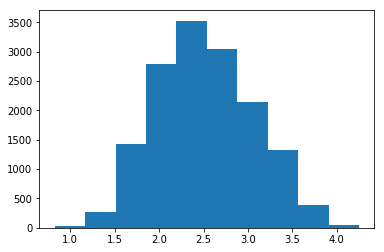

In [258]:
plt.hist(oof_train)

In [259]:
# Compute QWK based on OOF train predictions:
optR = OptimizedRounder()
optR.fit(oof_train, X_train['AdoptionSpeed'].values)
coefficients = optR.coefficients()
pred_test_y_k = optR.predict(oof_train, coefficients)
print("\nValid Counts = ", Counter(X_train['AdoptionSpeed'].values))
print("Predicted Counts = ", Counter(pred_test_y_k))
print("Coefficients = ", coefficients)
qwk = quadratic_weighted_kappa(X_train['AdoptionSpeed'].values, pred_test_y_k)
print("QWK = ", qwk)


Valid Counts =  Counter({4.0: 4197, 2.0: 4037, 3.0: 3259, 1.0: 3090, 0.0: 410})
Predicted Counts =  Counter({2.0: 4070, 1.0: 4014, 4.0: 3867, 3.0: 3042})
Coefficients =  [0.41720103 2.14460985 2.54164036 2.88703955]
QWK =  0.4474987632959183


In [260]:
# Manually adjusted coefficients:

coefficients_ = coefficients.copy()

coefficients_[0] = 1.645
coefficients_[1] = 2.115
coefficients_[3] = 2.84

train_predictions = optR.predict(oof_train, coefficients_).astype(int)
print('train pred distribution: {}'.format(Counter(train_predictions)))

test_predictions = optR.predict(oof_test.mean(axis=1), coefficients_)
print('test pred distribution: {}'.format(Counter(test_predictions)))

train pred distribution: Counter({2: 4351, 4: 4181, 1: 3063, 3: 2728, 0: 670})
test pred distribution: Counter({4.0: 1229, 2.0: 1150, 1.0: 806, 3.0: 678, 0.0: 109})


In [261]:
# Distribution inspection of original target and predicted train and test:

print("True Distribution:")
print(pd.value_counts(X_train['AdoptionSpeed'], normalize=True).sort_index())
print("\nTrain Predicted Distribution:")
print(pd.value_counts(train_predictions, normalize=True).sort_index())
print("\nTest Predicted Distribution:")
print(pd.value_counts(test_predictions, normalize=True).sort_index())

True Distribution:
0.0    0.027346
1.0    0.206096
2.0    0.269259
3.0    0.217368
4.0    0.279931
Name: AdoptionSpeed, dtype: float64

Train Predicted Distribution:
0    0.044688
1    0.204295
2    0.290202
3    0.181952
4    0.278863
dtype: float64

Test Predicted Distribution:
0.0    0.027442
1.0    0.202920
2.0    0.289527
3.0    0.170695
4.0    0.309416
dtype: float64


In [262]:
# Generate submission:

submission = pd.DataFrame({'PetID': test['PetID'].values, 'AdoptionSpeed': test_predictions.astype(np.int32)})
submission.head()
submission.to_csv('submission.csv', index=False)